<a href="https://colab.research.google.com/github/rafaelreisramos/oracle-one/blob/main/challenge-telecom-x-parte_2/TelecomX_BR_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação dos dados e tratamentos adicionais

In [290]:
import pandas as pd

In [291]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/challenge-telecom-x-parte_2/dados/telecom_x.csv')
df.head()

,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,False,Female,False,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7032 non-null   bool   
 1   Gender             7032 non-null   object 
 2   Senior_Citizen     7032 non-null   bool   
 3   Partner            7032 non-null   bool   
 4   Dependents         7032 non-null   bool   
 5   Tenure             7032 non-null   int64  
 6   Phone_Service      7032 non-null   bool   
 7   Multiple_Lines     7032 non-null   object 
 8   Internet_Service   7032 non-null   object 
 9   Online_Security    7032 non-null   object 
 10  Online_Backup      7032 non-null   object 
 11  Device_Protection  7032 non-null   object 
 12  Tech_Support       7032 non-null   object 
 13  Streaming_TV       7032 non-null   object 
 14  Streaming_Movies   7032 non-null   object 
 15  Contract           7032 non-null   object 
 16  Paperless_Billing  7032 

Para os algoritmos de Machine Learning as variáveis de entrada devem ser mapeadas em valores numéricos. Vamos então mapear as colunas booleanas e a coluna `Gender` da seguinte forma:
- `{True: 1, False: 0}`
- `{'Male': 1, 'Female': 0}`

In [293]:
df = df.replace({'Male': True, 'Female': False}).infer_objects(copy=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7032 non-null   bool   
 1   Gender             7032 non-null   bool   
 2   Senior_Citizen     7032 non-null   bool   
 3   Partner            7032 non-null   bool   
 4   Dependents         7032 non-null   bool   
 5   Tenure             7032 non-null   int64  
 6   Phone_Service      7032 non-null   bool   
 7   Multiple_Lines     7032 non-null   object 
 8   Internet_Service   7032 non-null   object 
 9   Online_Security    7032 non-null   object 
 10  Online_Backup      7032 non-null   object 
 11  Device_Protection  7032 non-null   object 
 12  Tech_Support       7032 non-null   object 
 13  Streaming_TV       7032 non-null   object 
 14  Streaming_Movies   7032 non-null   object 
 15  Contract           7032 non-null   object 
 16  Paperless_Billing  7032 

/tmp/ipython-input-3047520425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': True, 'Female': False}).infer_objects(copy=False)


## Codificação das variáveis

Vamos dividir nossos dados em `x` e `y`

In [294]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

Agora vamos codificar as colunas do tipo `object`

In [295]:
object_cols = list(df.select_dtypes(include='object').columns)
cols = x.columns

In [296]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = make_column_transformer((
        OneHotEncoder(),
        object_cols
    ),
    remainder = 'passthrough',
    sparse_threshold=0)
x = one_hot.fit_transform(x)

df_encoded = pd.DataFrame(x, columns = one_hot.get_feature_names_out(cols)).join(df['Churn'])
df_encoded.columns = df_encoded.columns.str.removeprefix('onehotencoder__')
df_encoded.columns = df_encoded.columns.str.removeprefix('remainder__')

## Análise de correlação

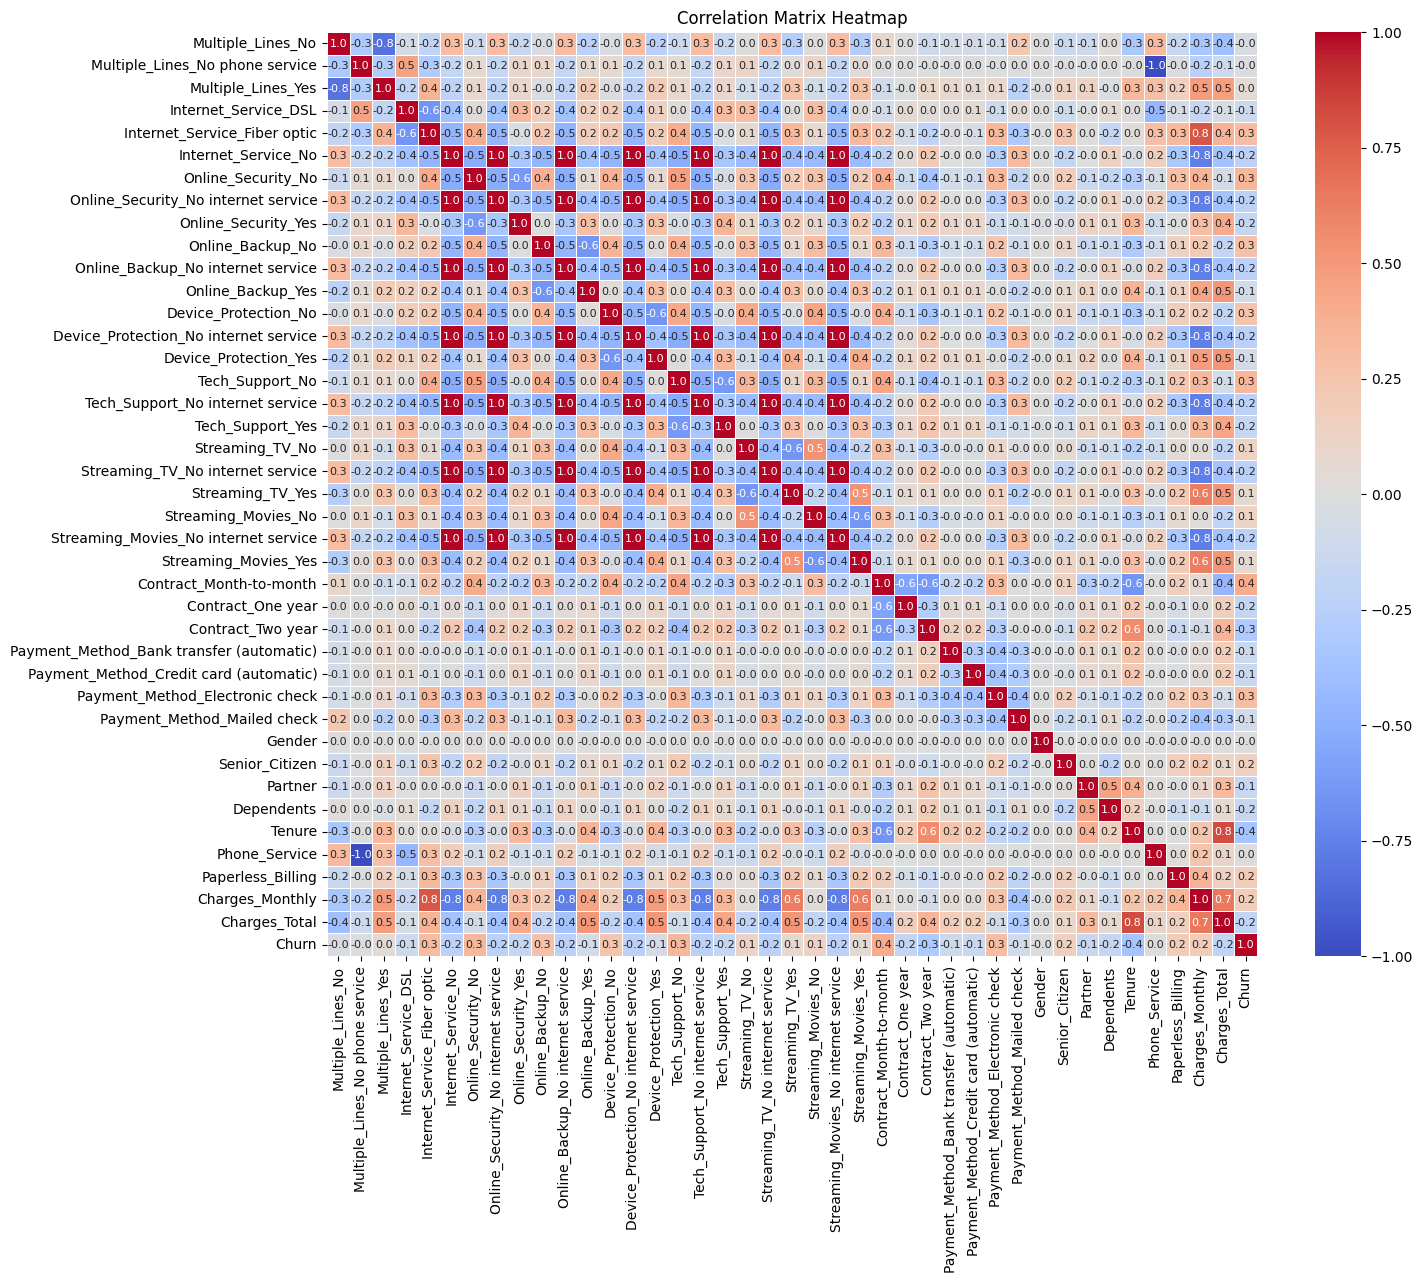

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(matrix):
    plt.figure(figsize=(15, 12)) # Adjust figure size for better readability
    annot_kws = {'size': 8}
    sns.heatmap(matrix,
                annot=True,     # Show correlation values on the heatmap
                annot_kws=annot_kws,
                cmap='coolwarm', # Choose a colormap (e.g., 'coolwarm', 'RdYlGn', 'viridis')
                fmt=".1f",      # Format the annotation values to two decimal places
                linewidths=.5)  # Add lines between cells for clarity
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_correlation_matrix(df_encoded.corr())

In [298]:
df_transformed = df.copy()
df_transformed = df_transformed.replace({'No internet service': 'No', 'No phone service': 'No'})

columns_to_bool = ['Gender', 'Multiple_Lines', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']
df_transformed[columns_to_bool] = df_transformed[columns_to_bool].replace({'Yes': True, 'No': False})
df_transformed[columns_to_bool] = df_transformed[columns_to_bool].astype(bool)

/tmp/ipython-input-3790852239.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_transformed[columns_to_bool] = df_transformed[columns_to_bool].replace({'Yes': True, 'No': False})


Agora vamos refazer o `encoded` e verificar a nova matriz de correlação.

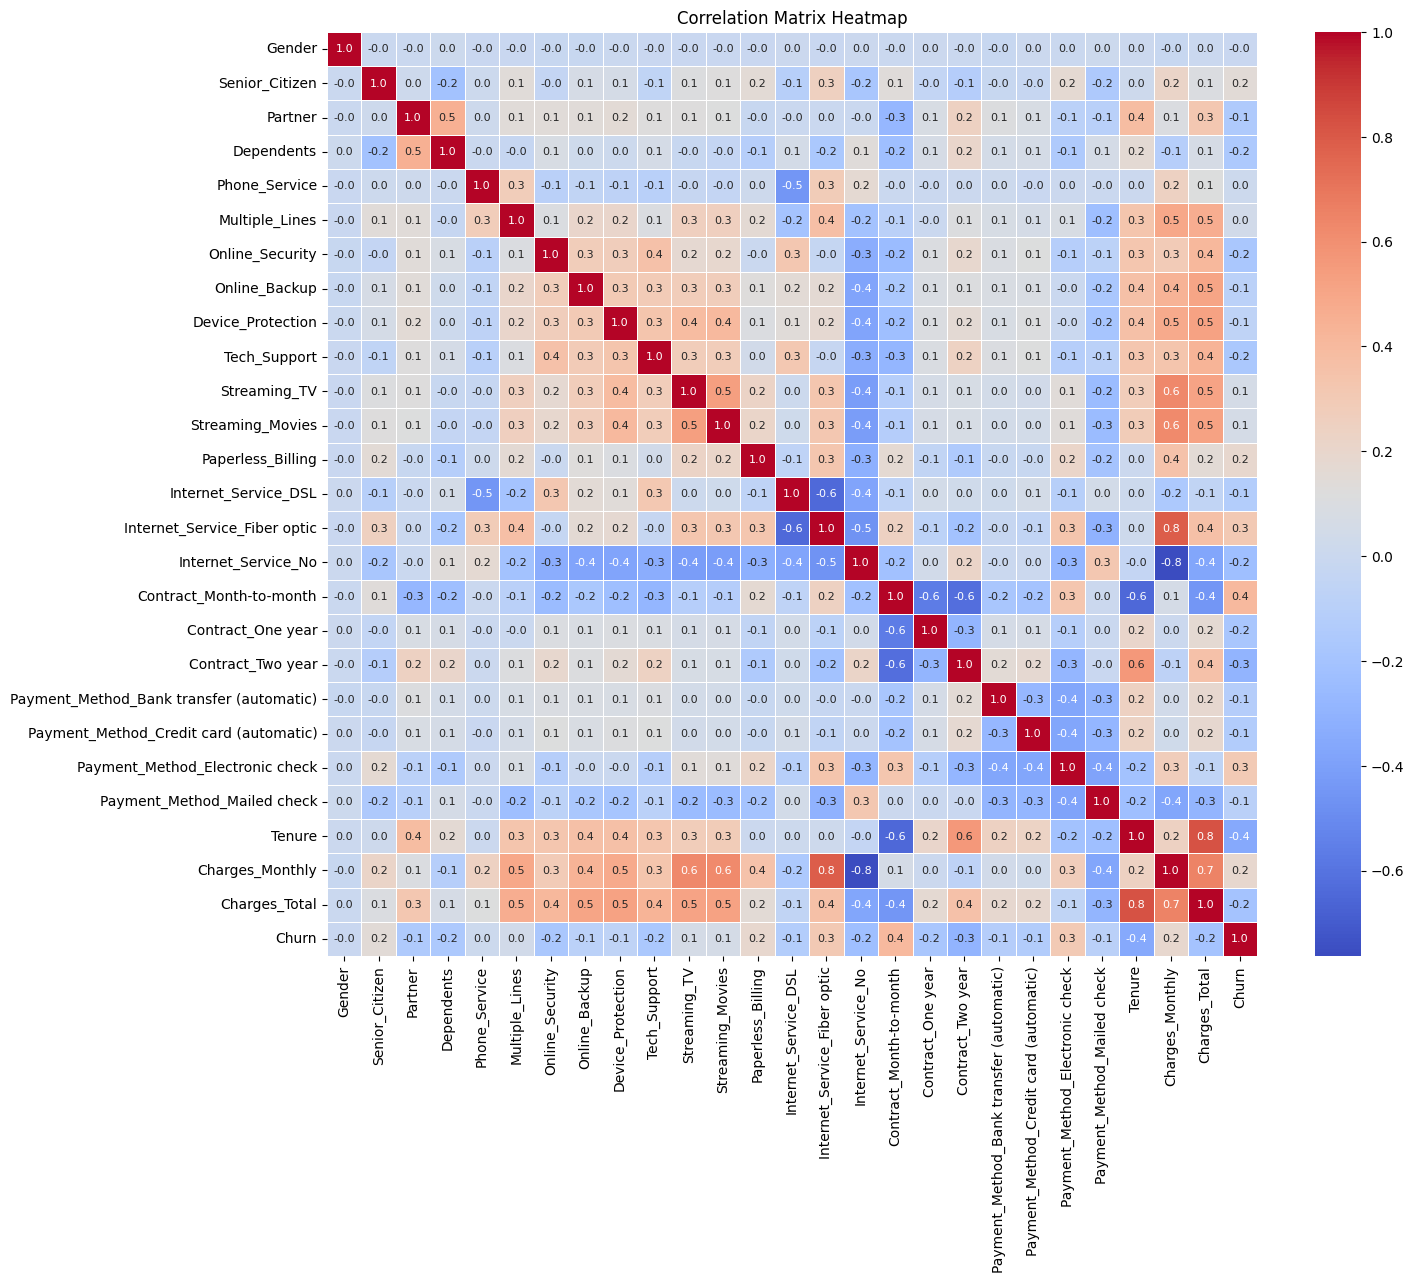

In [299]:
x = df_transformed.drop('Churn', axis = 1)
y = df_transformed['Churn']

bool_cols = list(x.select_dtypes(include='bool').columns)
object_cols = list(x.select_dtypes(include='object').columns)

one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), bool_cols),
    (OneHotEncoder(), object_cols),
    remainder = 'passthrough',
    sparse_threshold=0)

x = one_hot.fit_transform(x)
df_encoded = pd.DataFrame(x, columns = one_hot.get_feature_names_out(cols)).join(df['Churn'])

df_encoded.columns = df_encoded.columns.str.removeprefix('onehotencoder-1__')
df_encoded.columns = df_encoded.columns.str.removeprefix('onehotencoder-2__')
df_encoded.columns = df_encoded.columns.str.removeprefix('remainder__')
df_encoded.columns = df_encoded.columns.str.removesuffix('_True')

plot_correlation_matrix(df_encoded.corr())

Notamos um `quadrado` problemático com alta correlação. Nesta área todos observamos a correlação forte entre aqueles que tem `No_internet_service`. Poderíamos classificar estes serviços como `No` mas vamos optar por excluir as variáveis com `No_internet_service`. Da mesma forma excluiremos também `No_phone_service`.

## Análise de colinearidade

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, target):
    X = df.drop(columns=[target])
    X_const = add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

    display(vif_data.sort_values(by='VIF', ascending=False))

calculate_vif(df_encoded, 'Churn')

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
16,Internet_Service_No,inf
22,Payment_Method_Electronic check,inf
23,Payment_Method_Mailed check,inf
19,Contract_Two year,inf
20,Payment_Method_Bank transfer (automatic),inf
21,Payment_Method_Credit card (automatic),inf
18,Contract_One year,inf
15,Internet_Service_Fiber optic,inf
14,Internet_Service_DSL,inf
17,Contract_Month-to-month,inf


Podemos também observar que `Charges_Monthly`, `Tenure` e `Charges_Total` apresentam colinearidade. Sabendo que `Charges_Total = Tenure * Charges_Monthly` vamos manter somente `Charges__Total` que reune as duas características.

In [301]:
columns_to_drop = ['Tenure', 'Charges_Monthly', 'Internet_Service_No', 'Contract_Two year', 'Payment_Method_Credit card (automatic)']
df_encoded.drop(columns_to_drop, axis=1, inplace=True)
calculate_vif(df_encoded, 'Churn')

,feature,VIF
0,const,29.531347
15,Internet_Service_Fiber optic,4.310947
21,Charges_Total,4.026173
14,Internet_Service_DSL,3.543171
16,Contract_Month-to-month,3.048605
19,Payment_Method_Electronic check,2.016661
20,Payment_Method_Mailed check,1.788874
12,Streaming_Movies,1.693425
11,Streaming_TV,1.681529
17,Contract_One year,1.627046


## Análise das Features

Antes mesmo de analisar a colinearidade vamos verificar quais as variávies que mais contribuem para o `Churn`. Vamos usar uma técnica agnóstica de modelo usando `SelectKBest`. Mais adinate vamos comparar esta seleção após a análise de colinearidade.

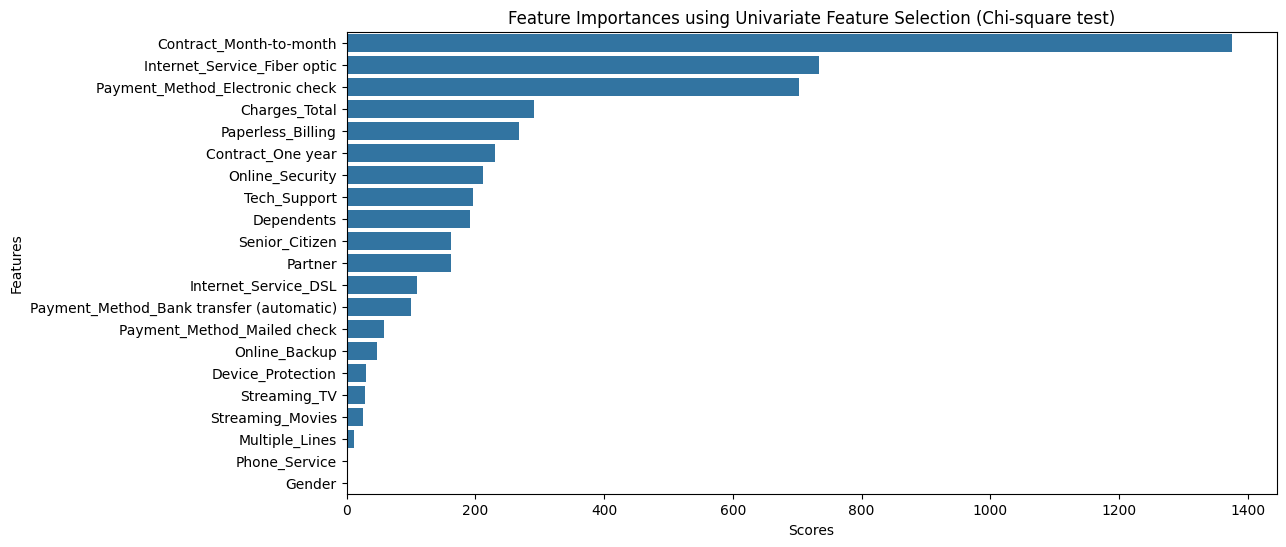

In [302]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Churn', axis = 1)
columns = X.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
target = df_encoded['Churn']

# apply univariate feature selection
best_features = SelectKBest(score_func=f_regression, k=10).fit(scaled_data, target)

# get the scores and selected features
scores = best_features.scores_
selected_features = columns[best_features.get_support()]

sorted_idxs = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_idxs]
sorted_feature_names = np.array(columns)[sorted_idxs]

# plot scores
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_scores, y=sorted_feature_names)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importances using Univariate Feature Selection (Chi-square test)')
plt.show()

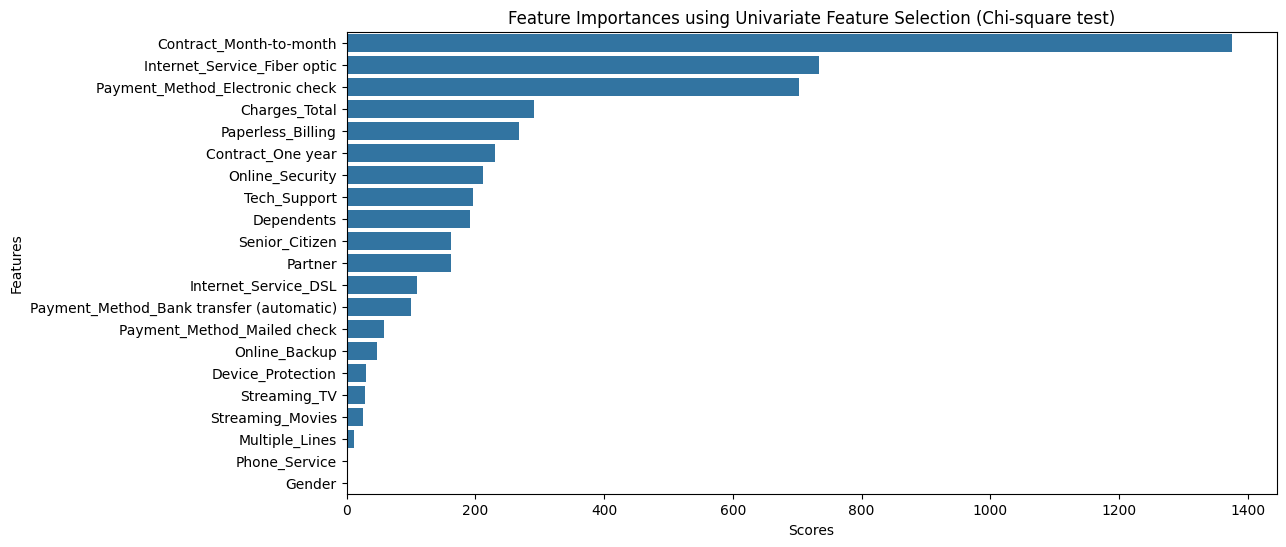

In [303]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Churn', axis = 1)
columns = X.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
target = df_encoded['Churn']

# apply univariate feature selection
best_features = SelectKBest(score_func=f_classif, k=10).fit(scaled_data, target)

# get the scores and selected features
scores = best_features.scores_
selected_features = columns[best_features.get_support()]

sorted_idxs = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_idxs]
sorted_feature_names = np.array(columns)[sorted_idxs]

# plot scores
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_scores, y=sorted_feature_names)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importances using Univariate Feature Selection (Chi-square test)')
plt.show()

`Multiple_Lines_No`, `Multiple_Lines_Yes` estão diretamente ligadas a `Phone_Service = 1` que representa a presença de linha telefônica. Vamos então manter somente `Phone_Service` e recalcular o `VIF`.

Da mesma forma, `Internet_Service_DSL`, `Internet_Service_Fiber optic` também estão ligadas a `Internet_Service_No`. Eliminaremos `Internet_Service_No`.

In [304]:
#def filter_correlation_matrix(matrix, target, limiar = 0):
#    variaveis_relevantes = matrix.index[abs(matrix[target]) >= limiar].tolist()
#
#    if target not in variaveis_relevantes:
#        variaveis_relevantes.append(target)
#
#    filtered_matrix = matrix.loc[variaveis_relevantes, variaveis_relevantes]
#    return filtered_matrix
#
#filtered_correlation_matrix = filter_correlation_matrix(correlation_matrix, 'Churn', 0.2)
#
#plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
#sns.heatmap(filtered_correlation_matrix,
#            annot=True,     # Show correlation values on the heatmap
#            cmap='coolwarm', # Choose a colormap (e.g., 'coolwarm', 'RdYlGn', 'viridis')
#            fmt=".2f",      # Format the annotation values to two decimal places
#            linewidths=.5)  # Add lines between cells for clarity
#plt.title('Correlation Matrix Heatmap')
#plt.show()

## Balanceamento dos dados

In [305]:
y.value_counts(normalize = True)

,proportion
Churn,
False,0.734215
True,0.265785


Uma vez que nosso conjunto de dados tem um número de itens não tão extenso vamos balancear os dados com a técnica de `Oversampling`. Se usássemos `Undersampling` a redução dos dados seria significativa e prejudicaria o modelo.

Após o balanceamento conferimos os dados com `value_counts()`

In [306]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state = 47)
X_balanced, y_balanced = oversample.fit_resample(x, y)
y_balanced.value_counts(normalize=False)

,count
Churn,
False,5163
True,5163


## Divisão de dados em treino e teste

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify=y_balanced, random_state=47, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=47)

In [316]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)
#y_pred_dummy = dummy.predict(X_test)
#
#def calcular_metricas_regressao(y_test, y_pred):
#
#    rmse = mean_squared_error(y_test, y_pred)
#    mae = mean_absolute_error(y_test, y_pred)
#    r2 = r2_score(y_test, y_pred)
#
#    metricas = {
#        'Raiz do Erro Quadrático Médio': round(rmse, 4),
#        'Erro Absoluto Médio': round(mae, 4),
#        'R2 Score': round(r2, 4)
#    }
#
#    return metricas
#calcular_metricas_regressao(y_test, y_pred_dummy)
##print(f'Acurácia de treino: {dummy.score(X_train, y_train)}')
##print(f'Acurácia de validação: {dummy.score(X_val, y_val)}')
##print(f'Acurácia de teste: {dummy.score(X_test, y_test)}')

-2.6056577784316914e-08

### Decision Tree Classifier

In [319]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=47)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8102613746369797

In [322]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=47)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8117134559535334

In [331]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate

In [332]:
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

def calculate_metrics(results):
    for metric in scoring.keys():
        scores = results[f'test_{metric}']
        mean_score = "{:.3f}".format(scores.mean())
        std_score = "{:.3f}".format(scores.std())

        print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
        print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
        print('----------------------------------------------------------------')

In [333]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

dtc = DecisionTreeClassifier(random_state=47)
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=dtc_param_grid,
                           cv=skf,  # Number of cross-validation folds
                           scoring='accuracy', # Or other relevant metric like 'f1', 'precision', 'recall'
                           n_jobs=-1, # Use all available CPU cores for parallel processing
                           verbose=1) # Controls the verbosity of the output
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_dtc = grid_search.best_estimator_
best_dtc.score(X_test, y_test)

cv_results = cross_validate(best_dtc, X_train, y_train, cv=skf, scoring=scoring)
calculate_metrics(cv_results)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
MAE Scores: ['-0.178', '-0.166', '-0.172', '-0.169', '-0.166']
MAE Média: -0.170, Std: 0.004
----------------------------------------------------------------
RMSE Scores: ['-0.421', '-0.408', '-0.415', '-0.411', '-0.408']
RMSE Média: -0.412, Std: 0.005
----------------------------------------------------------------
R2 Scores: ['0.290', '0.335', '0.312', '0.325', '0.335']
R2 Média: 0.319, Std: 0.017
----------------------------------------------------------------


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier(random_state=47)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=rfc_param_grid,
                           cv=skf,
                           scoring='accuracy',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_rfc = grid_search.best_estimator_
best_rfc.score(X_test, y_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
